## Further Reading

- The [Matplotlib gallery](http://matplotlib.org/gallery.html) provides many examples.  
- A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux.  
- [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy
  switching between plot styles.  
- [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.  

## Overview

We’ve already generated quite a few figures in these lectures using [Matplotlib](http://matplotlib.org/).

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

Matplotlib is an outstanding graphics library, designed for scientific computing, with

- high-quality 2D and 3D plots  
- output in all the usual formats (PDF, PNG, etc.)  
- LaTeX integration  
- fine-grained control over all aspects of presentation  
- animation, etc.  

### Matplotlib’s Split Personality

Matplotlib is unusual in that it offers two different interfaces to plotting.

One is a simple MATLAB-style API (Application Programming Interface) that was written to help MATLAB refugees find a ready home.

The other is a more “Pythonic” object-oriented API.

For reasons described below, we recommend that you use the second API.

But first, let’s discuss the difference.

## The APIs


<a id='index-2'></a>

### The MATLAB-style API

Here’s the kind of easy example you might find in introductory treatments

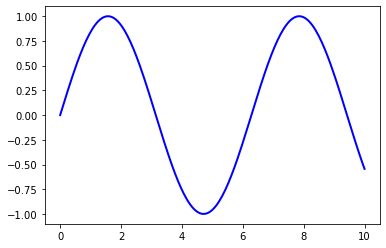

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 200)
# Takes the sin of x for all x in the array
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

This is simple and convenient, but also somewhat limited and un-Pythonic.

For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer.

Python programmers tend to prefer a more explicit style of programming (run `import this` in a code block and look at the second line).

This leads us to the alternative, object-oriented Matplotlib API.

### The Object-Oriented API

Here’s the code corresponding to the preceding figure using the object-oriented API

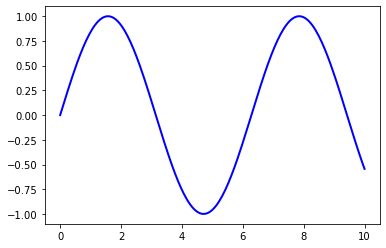

In [2]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a `Figure` instance—like a blank canvas.  
- `ax` is an `AxesSubplot` instance—think of a frame for plotting in.  


The `plot()` function is actually a method of `ax`.

While there’s a bit more typing, the more explicit use of objects gives us better control.

This will become more clear as we go along.

### Tweaks

Here we’ve changed the line to red and added a legend

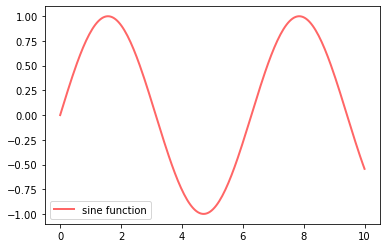

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

We’ve also used `alpha` to make the line slightly transparent—which makes it look smoother.

The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

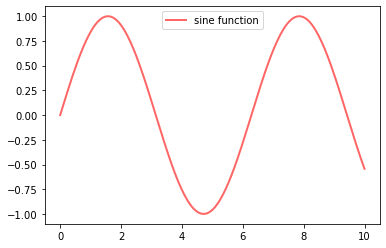

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

If everything is properly configured, then adding LaTeX is trivial

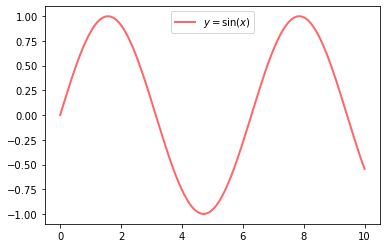

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward

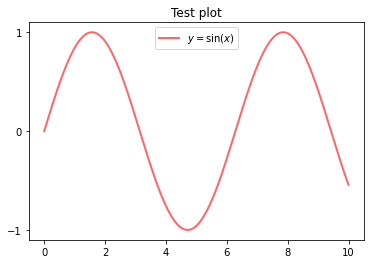

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

## More Features

Matplotlib has a huge array of functions and features, which you can discover
over time as you have need for them.

We mention just a few.

### Multiple Plots on One Axis


<a id='index-3'></a>
It’s straightforward to generate multiple plots on the same axes.

Here’s an example that randomly generates three normal densities and adds a label with their mean

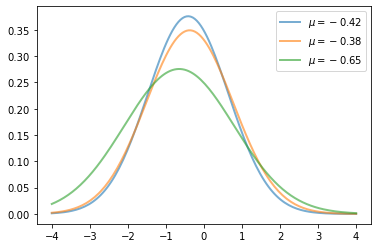

In [7]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

### Multiple Subplots


<a id='index-4'></a>
Sometimes we want multiple subplots in one figure.

Here’s an example that generates 6 histograms

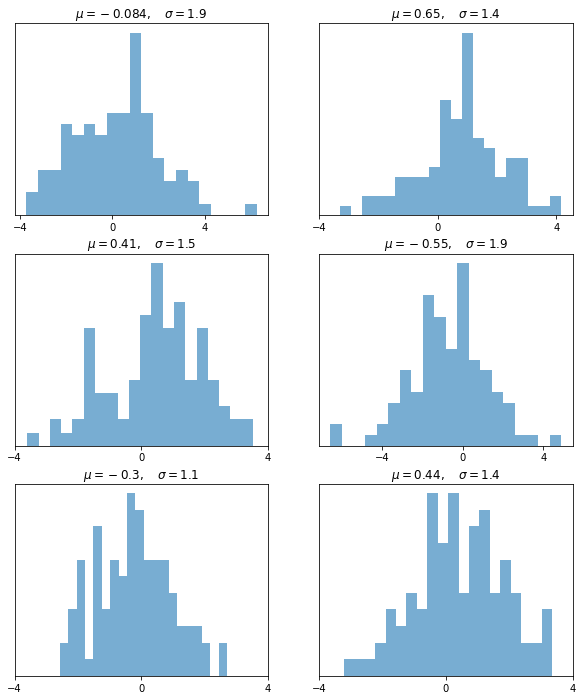

In [8]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

### 3D Plots


<a id='index-5'></a>
Matplotlib does a nice job of 3D plots — here is one example

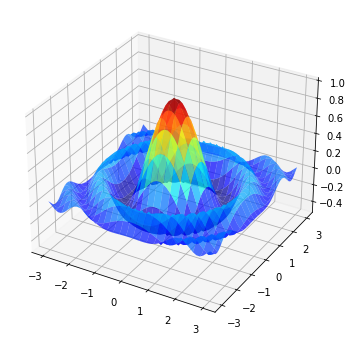

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

### A Customizing Function

Perhaps you will find a set of customizations that you regularly use.

Suppose we usually prefer our axes to go through the origin, and to have a grid.

Here’s a nice example from [Matthew Doty](https://github.com/xcthulhu) of how the object-oriented API can be used to build a custom `subplots` function that implements these changes.

Read carefully through the code and see if you can follow what’s going on

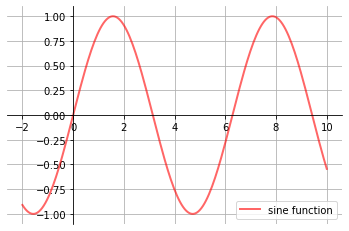

In [10]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom `subplots` function

1. calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,  
1. makes the desired customizations to `ax`, and  
1. passes the `fig, ax` pair back to the calling code.  

# Error Bars

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

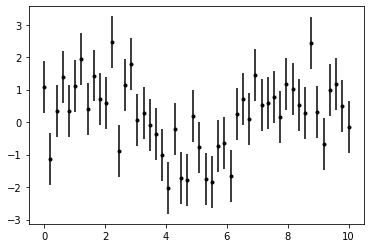

In [11]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``, outlined in [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb).

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

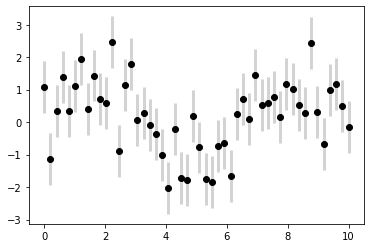

In [12]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);